In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
e_commerce=pd.read_csv("C:\\Users\\hp\\Downloads\\Ecommerce_Data.csv")

In [3]:
holidays=pd.read_csv("C:\\Users\\hp\\Downloads\\US_Holiday_Dates_(2004-2021).csv")

In [4]:
e_commerce.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
0,439570,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12
1,387281,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10
2,337863,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9
3,57628,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13
4,330897,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10


In [5]:
e_commerce["Hour"].corr(e_commerce["Quantity"])

-0.04309490429542515

In [6]:
df_Time_Table=e_commerce["Date"]

In [7]:
df_Time_Table["Date"] = pd.to_datetime(e_commerce["Date"])

# Cal Year
df_year= df_Time_Table['Date'].dt.strftime('%Y')

<ipython-input-7-d111766466bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Time_Table["Date"] = pd.to_datetime(e_commerce["Date"])


In [8]:
df_year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
81596    2011
81597    2011
81598    2011
81599    2011
81600    2011
Name: Date, Length: 81601, dtype: object

In [9]:
df_month = df_Time_Table['Date'].dt.strftime('%m')
df_day =df_Time_Table['Date'].dt.strftime('%d')

In [10]:
df_month
df_day

0        04
1        10
2        13
3        14
4        08
         ..
81596    20
81597    05
81598    27
81599    03
81600    22
Name: Date, Length: 81601, dtype: object

In [11]:
df_dayname = df_Time_Table['Date'].dt.day_name()

In [12]:
df_dayname

0           Friday
1           Monday
2          Tuesday
3           Friday
4         Thursday
           ...    
81596    Wednesday
81597    Wednesday
81598       Sunday
81599    Wednesday
81600      Tuesday
Name: Date, Length: 81601, dtype: object

In [13]:
df=pd.concat([pd.DataFrame(df_Time_Table),pd.DataFrame(df_year),pd.DataFrame(df_month),pd.DataFrame(df_dayname),pd.DataFrame(df_day)],axis=1)

In [14]:
df.drop("Date",axis=0,inplace=True)


In [15]:
df.set_axis(["Date","year","month","day_name","day_of_week"], axis='columns', inplace=True)

In [16]:
df.drop("Date",axis=1,inplace=True)

In [17]:
e_commerce=pd.concat([e_commerce,df],axis=1)

In [18]:
e_commerce.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour,year,month,day_name,day_of_week
0,439570,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12,2011,11,Friday,04
1,387281,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10,2011,10,Monday,10
2,337863,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9,2011,09,Tuesday,13
3,57628,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13,2011,01,Friday,14
4,330897,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10,2011,09,Thursday,08


In [19]:
e_commerce["day_name"].value_counts()

Thursday     16642
Wednesday    14123
Tuesday      13614
Monday       13300
Sunday       12674
Friday       11248
Name: day_name, dtype: int64

In [20]:
e_commerce.drop(["Unnamed: 0","InvoiceNo","StockCode","CustomerID","Description"],axis=1,inplace=True)

In [21]:
e_commerce["Total_price"]=e_commerce["Quantity"]*e_commerce["UnitPrice"]

In [22]:
e_commerce.drop(["Quantity","UnitPrice"],axis=1,inplace=True)

country=pd.DataFrame(e_commerce["Country"].value_counts()).reset_index()

In [23]:
df=pd.get_dummies(e_commerce["Country"])

In [24]:
e_commerce=pd.concat([df,e_commerce],axis=1)

In [25]:
e_commerce["Date"].value_counts()

2011-11-06    710
2011-11-10    702
2011-11-23    676
2011-12-05    659
2011-11-20    620
             ... 
2010-12-21     87
2011-02-09     85
2010-12-23     65
2011-02-06     49
2010-12-22     35
Name: Date, Length: 305, dtype: int64

In [26]:
e_commerce.drop("Country",axis=1,inplace=True)

In [27]:
e_commerce.head()

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,United Arab Emirates,United Kingdom,Unspecified,Date,Hour,year,month,day_name,day_of_week,Total_price
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2011-11-04,12,2011,11,Friday,04,3.25
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2011-10-10,10,2011,10,Monday,10,89.40
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2011-09-13,9,2011,09,Tuesday,13,45.00
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2011-01-14,13,2011,01,Friday,14,16.50
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2011-09-08,10,2011,09,Thursday,08,90.00


In [28]:
date_1=pd.DataFrame(e_commerce["Date"].value_counts()).reset_index()
date_1

,index,Date
0,2011-11-06,710
1,2011-11-10,702
2,2011-11-23,676
3,2011-12-05,659
4,2011-11-20,620
...,...,...
300,2010-12-21,87
301,2011-02-09,85
302,2010-12-23,65
303,2011-02-06,49


sale on day 2011-11-6 in uk

United Kingdom          72617
Germany                  1898
France                   1689
EIRE                     1500
Spain                     504
Netherlands               469
Belgium                   379
Switzerland               358
Portugal                  284
Australia                 254
Norway                    217
Italy                     169
Finland                   157
Channel Islands           157
Cyprus                    119
Austria                    99
Sweden                     98
Japan                      84
Denmark                    82
USA                        67
Poland                     57
Unspecified                55
Iceland                    48
Israel                     46
Singapore                  40
Greece                     34
Malta                      28
Canada                     23
RSA                        15
United Arab Emirates       14
European Community         11
Czech Republic              8
Lithuania                   6
Brazil                      5
Bahrain                     4
Saudi Arabia                3
Lebanon 

In [29]:
list_1=[7677.79,
 14997.699999999997,
 13425.529999999999,
 11379.76,
 6187.889999999999,
 10285.24,
 8694.510000000002,
 11049.619999999999,
 11764.660000000002,
 7231.45,
 10111.11,
 9867.87,
 8669.57,
 6561.89,
 8468.61,
 5035.740000000001,
 6620.81,
 10408.760000000002,
 7245.030000000002,
 6980.400000000001,
 7196.419999999999,
 6232.85,
 3331.81,
 9601.8,
 12227.85,
 11521.100000000002,
 7849.34,
 8288.53,
 6765.650000000001,
 8418.9,
 8280.210000000001,
 6953.08,
 9122.519999999997,
 8830.11,
 12018.48,
 19344.38,
 7455.62,
 7509.69,
 8616.68,
 8976.02,
 8332.99,
 6932.070000000001,
 10548.66,
 6395.050000000001,
 9139.560000000001,
 5955.37,
 5817.13,
 3947.3399999999997,
 5375.46,
 5635.7,
 6271.59,
 7660.42,
 10847.39,
 8384.529999999999,
 5770.820000000001,
 11889.859999999997,
 5630.9800000000005,
 8095.6,
 3430.05,
 1160.1500000000008,
 9487.689999999999,
 5617.5599999999995,
 6882.89,
 5579.6,
 4497.77,
 2400.59,
 4970.250000000001,
 6249.66,
 6390.17,
 7450.851,
 3765.81,
 6754.099999999999,
 5288.51,
 14383.899999999998,
 3437.0,
 5513.1,
 5544.22,
 9869.11,
 9211.85,
 6017.8099999999995,
 9833.61,
 4769.300000000001,
 6383.04,
 8511.79,
 6523.6900000000005,
 5849.52,
 4956.550000000001,
 7595.859999999999,
 8997.93,
 5622.0,
 13639.16,
 5122.01,
 7815.04,
 7464.489999999998,
 4442.299999999999,
 4073.0,
 5891.219999999999,
 8913.47,
 23220.32,
 6647.82,
 2229.1,
 6319.48,
 3754.74,
 4477.13,
 9973.6,
 7914.610000000001,
 5896.58,
 5852.58,
 6599.67,
 6298.299999999999,
 4872.57,
 5167.34,
 8093.74,
 4241.2,
 3636.2599999999998,
 11109.850000000002,
 3056.5299999999997,
 4416.200000000001,
 5877.410000000001,
 3328.8699999999994,
 3366.7599999999998,
 3859.39,
 7002.99,
 2611.03,
 4680.299999999999,
 4291.03,
 4951.610000000001,
 2067.39,
 3376.46,
 5194.9,
 4220.34,
 4789.919999999999,
 3282.5,
 5659.57,
 5730.750000000001,
 5671.26,
 4766.73,
 3800.91,
 4802.690000000001,
 4889.09,
 3895.31,
 4967.37,
 5264.620000000001,
 4130.39,
 3999.91,
 2981.120000000001,
 5449.060000000001,
 5068.7699999999995,
 4431.4,
 7945.250000000001,
 4491.02,
 4168.46,
 5054.4800000000005,
 4947.129999999999,
 -1921.8000000000004,
 4807.52,
 5999.32,
 4177.320000000001,
 6007.23,
 4900.139999999999,
 3327.2799999999997,
 4400.09,
 6758.639999999999,
 4396.05,
 3411.9500000000003,
 3743.9900000000002,
 4582.77,
 4348.78,
 3507.56,
 4613.14,
 4905.26,
 5149.84,
 5012.51,
 4252.3,
 5542.08,
 5195.93,
 3859.4900000000002,
 4250.22,
 4819.639999999999,
 5085.099999999999,
 5455.03,
 2587.46,
 2913.7800000000007,
 5262.39,
 4961.7300000000005,
 3407.6600000000003,
 3118.3300000000004,
 3911.14,
 4892.62,
 4571.36,
 3114.64,
 4476.870000000001,
 4179.130000000001,
 6512.54,
 2736.15,
 3294.7499999999995,
 4817.97,
 4949.5199999999995,
 4063.5399999999995,
 5668.239999999999,
 6128.599999999999,
 3008.12,
 4758.55,
 5741.98,
 4160.01,
 5138.13,
 7703.14,
 5822.289999999999,
 3596.02,
 2827.1400000000003,
 1615.8600000000001,
 4416.969999999999,
 4588.57,
 3574.000000000001,
 3244.66,
 2943.06,
 3047.12,
 2942.6399999999994,
 2953.73,
 4737.900000000001,
 2841.2200000000003,
 4556.97,
 2878.8399999999997,
 3522.19,
 2985.8700000000003,
 3034.5400000000004,
 3882.58,
 6776.750000000001,
 2890.7800000000007,
 4599.880000000001,
 2100.92,
 2944.7000000000003,
 5254.23,
 3525.399999999999,
 4278.02,
 5714.1900000000005,
 17436.66,
 2869.7799999999997,
 3137.8299999999995,
 2108.78,
 200.42999999999898,
 3128.6,
 2708.48,
 5908.839999999999,
 7713.550000000001,
 2053.5099999999998,
 2999.0699999999997,
 2518.4500000000003,
 5230.62,
 2642.0199999999995,
 2870.5899999999992,
 4803.25,
 2866.17,
 2711.5399999999995,
 1847.56,
 4342.84,
 5347.66,
 2107.4,
 2152.4799999999996,
 3261.02,
 4157.08,
 1073.6200000000001,
 2750.95,
 1401.65,
 4071.62,
 3687.94,
 1925.46,
 2728.5,
 2113.01,
 4249.5,
 2334.37,
 3735.5700000000006,
 1844.8400000000001,
 1259.94,
 2583.82,
 4681.92,
 3614.6099999999997,
 1755.24,
 1032.8899999999999,
 3098.82,
 2607.5299999999993,
 3289.8999999999996,
 2529.97,
 1165.8799999999999,
 2287.95,
 1271.9300000000003,
 3575.99,
 1070.23,
 1662.51,
 2919.9299999999994,
 1850.56,
 2618.96,
 1273.56,
 1019.7299999999999,
 1631.42,
 4419.28,
 1104.24,
 1536.62,
 1801.0500000000002,
 3960.1800000000003,
 1638.0199999999998,
 1036.7199999999998,
 845.83,
 568.03,
 281.18000000000006]


In [30]:
import pandas as pd
expenditure=pd.DataFrame(list_1)

In [31]:
final_dataset=pd.concat([date_1,expenditure],axis=1)
final_dataset

,index,Date,0
0,2011-11-06,710,7677.79
1,2011-11-10,702,14997.70
2,2011-11-23,676,13425.53
3,2011-12-05,659,11379.76
4,2011-11-20,620,6187.89
...,...,...,...
300,2010-12-21,87,1638.02
301,2011-02-09,85,1036.72
302,2010-12-23,65,845.83
303,2011-02-06,49,568.03


In [32]:
final_dataset.columns = ["Date","number","expenditure"]

In [33]:
final_dataset['Date']

0      2011-11-06
1      2011-11-10
2      2011-11-23
3      2011-12-05
4      2011-11-20
          ...    
300    2010-12-21
301    2011-02-09
302    2010-12-23
303    2011-02-06
304    2010-12-22
Name: Date, Length: 305, dtype: object

In [34]:
date_list=holidays['Date'].value_counts()

In [35]:
len(date_list)

336

In [36]:
date_list

2017-04-16    2
2007-04-08    2
2004-04-11    2
2014-04-20    2
2010-04-04    2
             ..
2016-11-23    1
2006-11-11    1
2010-09-04    1
2017-10-09    1
2016-02-15    1
Name: Date, Length: 336, dtype: int64

In [37]:
list_holiday=[]
for item in final_dataset["Date"]:
    if item in date_list:
        list_holiday.append(1)
    else:
        list_holiday.append(0)

In [38]:
final_dataset=pd.concat([final_dataset,pd.DataFrame(list_holiday)],axis=1)
final_dataset.columns = ["Date","number","expenditure","holiday"]

In [39]:
final_dataset

,Date,number,expenditure,holiday
0,2011-11-06,710,7677.79,0
1,2011-11-10,702,14997.70,0
2,2011-11-23,676,13425.53,1
3,2011-12-05,659,11379.76,0
4,2011-11-20,620,6187.89,0
...,...,...,...,...
300,2010-12-21,87,1638.02,0
301,2011-02-09,85,1036.72,0
302,2010-12-23,65,845.83,0
303,2011-02-06,49,568.03,0


In [40]:
df_Time_Table["Date"] = pd.to_datetime(final_dataset["Date"])
df_year= df_Time_Table['Date'].dt.strftime('%Y')

In [41]:
df_month = df_Time_Table['Date'].dt.strftime('%m')
df_day =df_Time_Table['Date'].dt.strftime('%d')

In [42]:
df_dayname = df_Time_Table['Date'].dt.day_name()

In [43]:
final_dataset=pd.concat([final_dataset,pd.DataFrame(df_dayname),df_month,df_day],axis=1)
final_dataset.columns = ["Date","number","expenditure","holiday","day_of_week","month","day"]

In [44]:
final_dataset

,Date,number,expenditure,holiday,day_of_week,month,day
0,2011-11-06,710,7677.79,0,Sunday,11,06
1,2011-11-10,702,14997.70,0,Thursday,11,10
2,2011-11-23,676,13425.53,1,Wednesday,11,23
3,2011-12-05,659,11379.76,0,Monday,12,05
4,2011-11-20,620,6187.89,0,Sunday,11,20
...,...,...,...,...,...,...,...
300,2010-12-21,87,1638.02,0,Tuesday,12,21
301,2011-02-09,85,1036.72,0,Wednesday,02,09
302,2010-12-23,65,845.83,0,Thursday,12,23
303,2011-02-06,49,568.03,0,Sunday,02,06


In [45]:
final_dataset.drop("number",axis=1,inplace=True)

In [46]:
final_dataset

,Date,expenditure,holiday,day_of_week,month,day
0,2011-11-06,7677.79,0,Sunday,11,06
1,2011-11-10,14997.70,0,Thursday,11,10
2,2011-11-23,13425.53,1,Wednesday,11,23
3,2011-12-05,11379.76,0,Monday,12,05
4,2011-11-20,6187.89,0,Sunday,11,20
...,...,...,...,...,...,...
300,2010-12-21,1638.02,0,Tuesday,12,21
301,2011-02-09,1036.72,0,Wednesday,02,09
302,2010-12-23,845.83,0,Thursday,12,23
303,2011-02-06,568.03,0,Sunday,02,06


In [47]:
final_dataset["holiday"].corr(final_dataset["expenditure"])

0.03972281249374753

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='expenditure'>

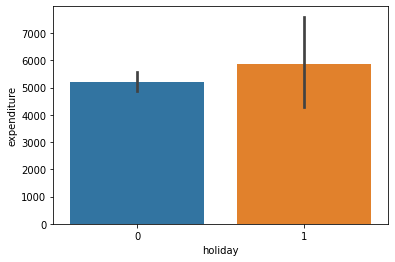

In [48]:
sns.barplot(final_dataset["holiday"],final_dataset["expenditure"])

In [49]:
final_dataset["month"]=final_dataset["month"].astype(int)
final_dataset["day"]=final_dataset["day"].astype(int)

In [50]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         305 non-null    object 
 1   expenditure  305 non-null    float64
 2   holiday      305 non-null    int64  
 3   day_of_week  305 non-null    object 
 4   month        305 non-null    int32  
 5   day          305 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 12.0+ KB


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='expenditure'>

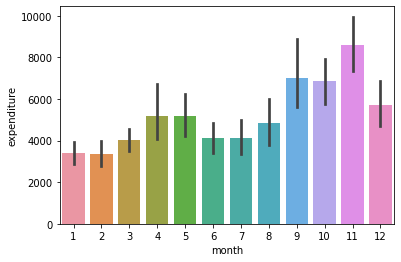

In [51]:
final_dataset["month"].corr(final_dataset["expenditure"])
sns.barplot(final_dataset["month"],final_dataset["expenditure"])


In [52]:
final_dataset["day"].corr(final_dataset["expenditure"])

-0.08282488757172457

In [53]:
day_of_week=pd.get_dummies(final_dataset["day_of_week"])

In [54]:
final_dataset=pd.concat([day_of_week,final_dataset],axis=1)

In [55]:
final_dataset

,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,Date,expenditure,holiday,day_of_week,month,day
0,0,0,1,0,0,0,2011-11-06,7677.79,0,Sunday,11,6
1,0,0,0,1,0,0,2011-11-10,14997.70,0,Thursday,11,10
2,0,0,0,0,0,1,2011-11-23,13425.53,1,Wednesday,11,23
3,0,1,0,0,0,0,2011-12-05,11379.76,0,Monday,12,5
4,0,0,1,0,0,0,2011-11-20,6187.89,0,Sunday,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,0,0,0,1,0,2010-12-21,1638.02,0,Tuesday,12,21
301,0,0,0,0,0,1,2011-02-09,1036.72,0,Wednesday,2,9
302,0,0,0,1,0,0,2010-12-23,845.83,0,Thursday,12,23
303,0,0,1,0,0,0,2011-02-06,568.03,0,Sunday,2,6


In [56]:
final_dataset["day"].corr(final_dataset["expenditure"])

-0.08282488757172457

In [78]:
x=final_dataset[["Friday","Monday","Sunday","Thursday","Tuesday","Wednesday","holiday","month","day"]]
y=final_dataset["expenditure"]

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [80]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test,y_test)

-0.05906325486153485

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [82]:
  def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [62]:
find_best_model_using_gridsearchcv(x,y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.278391,{'normalize': True}
1,lasso,0.278416,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,-0.035019,"{'criterion': 'mse', 'splitter': 'best'}"
